In [120]:
%load_ext autoreload
%autoreload 2

import sys

from sklearn.tree import export_text

sys.path.append('../..')
from viz import *
import viz
import imodels
from os.path import join as oj

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
from imodels.util.data_util import get_clean_dataset
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from sklearn.tree import DecisionTreeClassifier
from util import DATASET_PATH
print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 11 9


# overarching plots

100%|██████████| 6/6 [00:00<00:00, 13.03it/s]


<Figure size 2250x1250 with 0 Axes>

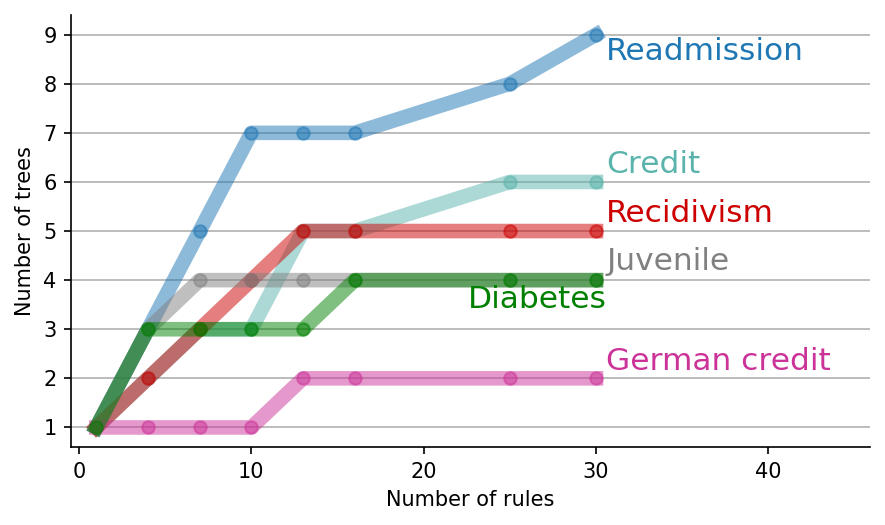

In [121]:
num_dsets = 6
datasets = DATASETS_CLASSIFICATION[::-1][:6] #+ DATASETS_REGRESSION[::-1]

R, C = ceil(num_dsets / 3), 3
plt.figure(figsize=(3 * C, 2.5 * R), facecolor='w')

COLORS = [cb, cg, cr, 'gray', cp, 'green']
COLORS = COLORS + COLORS + COLORS
plt.figure(figsize=(6, 3.6), dpi=150)
for i, dset in enumerate(tqdm(datasets)):
    dset_name = dset[0]
#     print(dset_name)

    pkl_file = oj('../../results', 'saps', dset_name, 'train-test/seed0/results_aggregated.pkl')
    data = pkl.load(open(pkl_file, 'rb'))  #['df']

    rules = data['df_rules']
#     rules['model'] = rules.index
    rules.index = np.arange(rules.shape[0])

    df = data['df']
#     df['model'] = df.index
    df.index = np.arange(df.shape[0])

    cols_to_use = df.columns.difference(rules.columns)
    d = rules.join(df[cols_to_use])

#     print('d', d)
    g = d[d.estimator == 'SAPS']
#     print('g', g)
    name = 'SAPS'
    est_params = g[dset_name]
#     print(est_params.iloc[0])
    trees = [x['trees_'] for x in est_params]  # change this to x['trees_']
    n_trees = np.array([len(t) for t in trees])

    x = g['complexity'].values
#     print(x, n_trees)
    plt.plot(x, n_trees, 'o-',
             alpha=0.5,
             label=dset_name.capitalize().replace('-', ' '), color=COLORS[i], lw=7)
    plt.ylabel('Number of trees')
    plt.xlabel('Number of rules')

# plt.legend(labelcolor='linecolor')
dvu.line_legend(adjust_text_labels=True, extra_spacing=0.5)
plt.grid(axis='y')
viz.savefig('num_trees')

# look at some specific models

- credit dataset - [data dictionary](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)
- diabetes dataset - [data dictionary](https://www.kaggle.com/c/diabetes-classification)

In [122]:
dset = ("diabetes", "diabetes", "pmlb")
# dset = ("credit", "credit_card_clean", 'imodels')

dset_name = dset[0]

pkl_file = oj('../../results', 'saps', dset_name, 'train-test/seed0/results_aggregated.pkl')
data = pkl.load(open(pkl_file, 'rb'))  #['df']

rules = data['df_rules']
# rules['model'] = rules.index
rules.index = np.arange(rules.shape[0])

df = data['df']
# df['model'] = df.index
df.index = np.arange(df.shape[0])

cols_to_use = df.columns.difference(rules.columns)
d = rules.join(df[cols_to_use])

g_saps = d[d.estimator == 'SAPS'].reset_index()
g_cart = d[d.estimator == 'CART'].reset_index()

In [133]:
X, y, feature_names = get_clean_dataset(dataset=dset[1], data_source=dset[2])
# feature_names = [
#     'Number of times pregnant',
#     'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
#     'Diastolic blood pressure (mm Hg)',
#     'Triceps skin fold thickness (mm)',
#     '2-Hour serum insulin (mu U/ml)',
#     'Body mass index (weight in kg/(height in m)^2)',
#     'Diabetes pedigree function', # relatives / history
#     'Age (years)',
# ]
feature_names = [
    'Num pregnancies',
    'Plasma glucose concentration',
    'Blood pressure',
    'Triceps skin fold thickness',
    '2-Hour serum insulin',
    'BMI',
    'Diabetes pedigree function',
    'Age',
]
df = pd.DataFrame(X, columns=feature_names)

In [134]:
df.head()

Num pregnancies  Plasma glucose concentration  Blood pressure  \
0              9.0                         140.0            94.0   
1              2.0                         108.0            80.0   
2              1.0                         128.0            48.0   
3              5.0                         130.0            82.0   
4              0.0                         121.0            66.0   

   Triceps skin fold thickness  2-Hour serum insulin   BMI  \
0                          0.0                   0.0  32.7   
1                          0.0                   0.0  27.0   
2                         45.0                 194.0  40.5   
3                          0.0                   0.0  39.1   
4                         30.0                 165.0  34.3   

   Diabetes pedigree function   Age  
0                       0.734  45.0  
1                       0.259  52.0  
2                       0.613  24.0  
3                       0.956  37.0  
4                       0.203  33.0

compare SAPS and CART for this data

In [140]:
g_saps[['complexity', 'rocauc_test', 'accuracy_test']].join(g_cart[['complexity', 'rocauc_test', 'accuracy_test']],
                                                           lsuffix='_saps', rsuffix='_cart').round(3)

complexity_saps  rocauc_test_saps  accuracy_test_saps  complexity_cart  \
0                1             0.751               0.773              1.0   
1                4             0.820               0.760              3.0   
2                7             0.836               0.773              7.0   
3               10             0.834               0.753             15.0   
4               13             0.819               0.740             26.0   
5               16             0.804               0.721              NaN   
6               25             0.814               0.721              NaN   
7               30             0.817               0.727              NaN   

   rocauc_test_cart  accuracy_test_cart  
0             0.751               0.773  
1             0.794               0.779  
2             0.817               0.786  
3             0.811               0.753  
4             0.816               0.753  
5               NaN                 NaN  
6               NaN                 NaN  
7               NaN                 NaN

In [136]:
model_num = 1
m = imodels.SaplingSumRegressor()
m.trees_ = g_saps[dset_name].iloc[model_num]['trees_'] # read in trees
m.feature_names_ = feature_names
print(m)

------------
Plasma glucose concentration <= 127.500 (Tree #0 root)
	Val: 0.200 (leaf)
	Plasma glucose concentration <= 165.500 (split)
		Val: 0.482 (leaf)
		Val: 0.807 (leaf)

	+
BMI <= 28.850 (Tree #1 root)
	Val: -0.176 (leaf)
	Val: 0.084 (leaf)

	+
Age <= 28.500 (Tree #2 root)
	Val: -0.082 (leaf)
	Val: 0.091 (leaf)



In [139]:
model_num_cart = 3
t = DecisionTreeClassifier()
t.classes_ = ['0', '1']
t.tree_ = g_cart.iloc[model_num_cart][dset_name]['tree_']
print(export_text(t, feature_names=feature_names, show_weights=True))
# plot_tree(t, feature_names=feature_names)
# plt.show()

|--- Plasma glucose concentration <= 127.50
|   |--- Age <= 29.50
|   |   |--- Num pregnancies <= 6.50
|   |   |   |--- BMI <= 31.30
|   |   |   |   |--- weights: [117.00, 1.00] class: 0
|   |   |   |--- BMI >  31.30
|   |   |   |   |--- weights: [87.00, 19.00] class: 0
|   |   |--- Num pregnancies >  6.50
|   |   |   |--- Blood pressure <= 30.00
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Blood pressure >  30.00
|   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- Age >  29.50
|   |   |--- BMI <= 27.15
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- weights: [30.00, 0.00] class: 0
|   |   |--- BMI >  27.15
|   |   |   |--- Plasma glucose concentration <= 106.50
|   |   |   |   |--- weights: [48.00, 19.00] class: 0
|   |   |   |--- Plasma glucose concentration >  106.50
|   |   |   |   |--- weights: [24.00, 33.00] class: 1
|--- Plasma glucose concentration >  127.50
|   |

In [ ]:
import pybaobabdt
# !pip install pybaobabdt pygraphviz
ax = pybaobabdt.drawTree(t, size=10, dpi=72, features=feature_names)